# Лаболаторная работа №6
## Вариант 7

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import math

%matplotlib inline
plt.style.use('fast')

## Задание 1

Text(0.5, 0, 'варианты $x_i$')

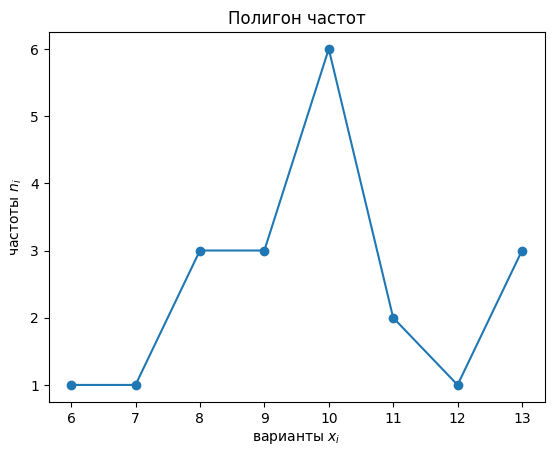

In [2]:
n = 20
x = np.linspace(0, n-1, n)
f = sts.binom(n=n, p=0.5)
random_values = f.rvs(n)
values = np.unique(random_values, return_counts=True)
x_i = values[0]
n_i = values[1]

plt.plot(x_i, n_i,'o-')
plt.title('Полигон частот')
plt.ylabel('частоты $n_i$')
plt.xlabel('варианты $x_i$')


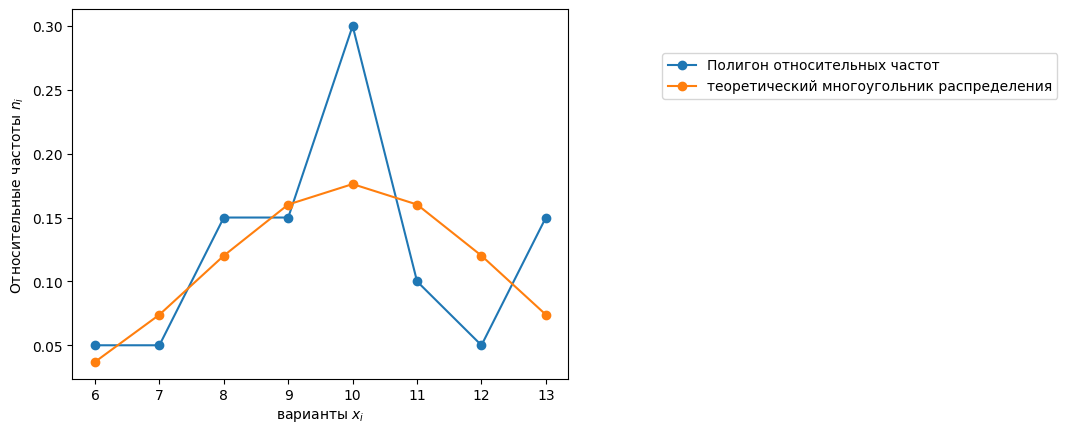

In [3]:
plt.plot(x_i, n_i/n,'o-', label="Полигон относительных частот")
plt.plot(x_i, f.pmf(x_i),'o-', label="теоретический многоугольник распределения")
plt.title('')
plt.ylabel('Относительные частоты $n_i$')
plt.xlabel('варианты $x_i$')
plt.legend(loc="upper right", bbox_to_anchor=(2, 0.9))
plt.show()

In [42]:
def empiric_cdf(y, n, value):
  return np.sum([i<=value for i in y])/n
def empiric_cdf_list(x, y, n):
  return [empiric_cdf(y, n, i) for i in x]
def print_stat(values):
  if len(values) == 0:
    return
  if type(values[0]) == str:
    v, counts = np.unique(values, return_counts= True )
    mode_value = v[np.argwhere (counts == np.max (counts))][0][0]
    print(f"Выборочная мода..............................: {mode_value}")
  if type(values[0]) in (int, float, np.int64, np.float64):
    print(f"Выборочная мода..............................: {sts.mode(values).mode:.02f}")
    print(f"Выборочное cреднее значение..................: {np.average(values):.02f}")
    print(f"Медиана......................................: {np.median(values):.02f}")
    print(f"Выборочная дисперсия.........................: {np.var(values):.02f}")
    print(f"Исправленная дисперсия.......................: {np.var(values, ddof=1):.02f}")
    print(f"Выборочное среднеквадратическое  отклонение..: {np.std(values):.02f}")
    print(f"Исправленное среднеквадратическое  отклонение: {np.std(values, ddof=1):.02f}")

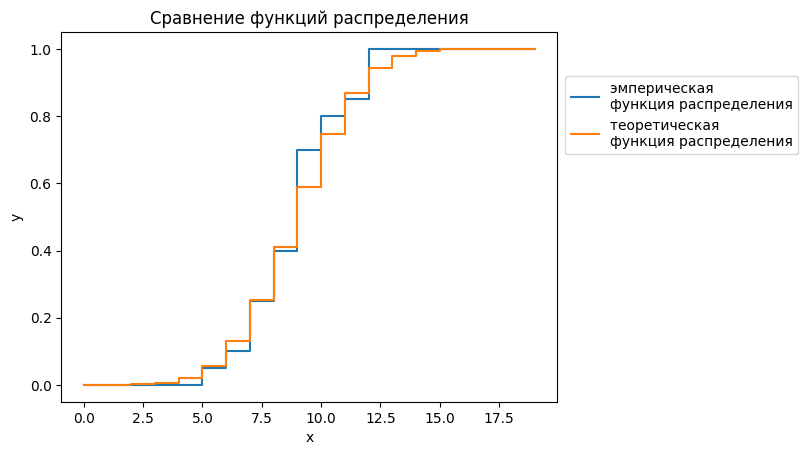

In [5]:
plt.step(x, empiric_cdf_list(x, random_values, n),'-', label="эмперическая \nфункция распределения")
plt.step(x, f.cdf(x),'-', label="теоретическая \nфункция распределения")
plt.title("Сравнение функций распределения")

plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc="upper right", bbox_to_anchor=(1.5, 0.9))
plt.show()

In [6]:
print_stat(random_values)


Выборочная мода..............................: 10.00
Выборочное cреднее значение..................: 9.85
Медиана......................................: 10.00
Выборочная дисперсия.........................: 3.63
Исправленная дисперсия.......................: 3.82
Выборочное среднеквадратическое  отклонение..: 1.90
Исправленное среднеквадратическое  отклонение: 1.95


## Задание 2

Text(0.5, 0, 'Диапазоны')

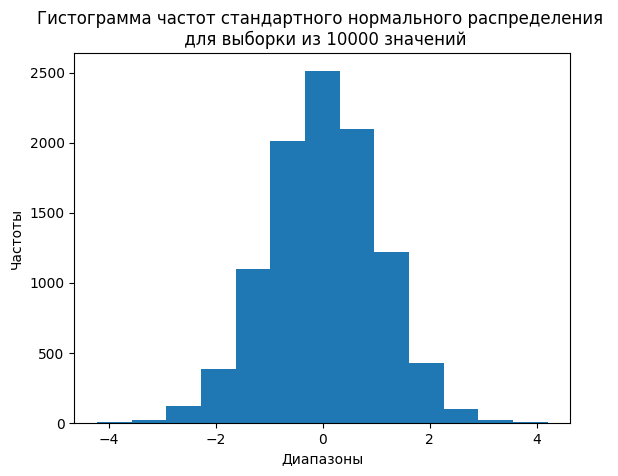

In [7]:
n = 10000
x = np.linspace(-4, 4, n)
f = sts.norm()
random_values = f.rvs(n)
m = int(math.log2(n))

plt.hist(random_values, m, density=False)
plt.title(f"Гистограмма частот стандартного нормального распределения \n для выборки из {n} значений")
plt.ylabel('Частоты')
plt.xlabel('Диапазоны')

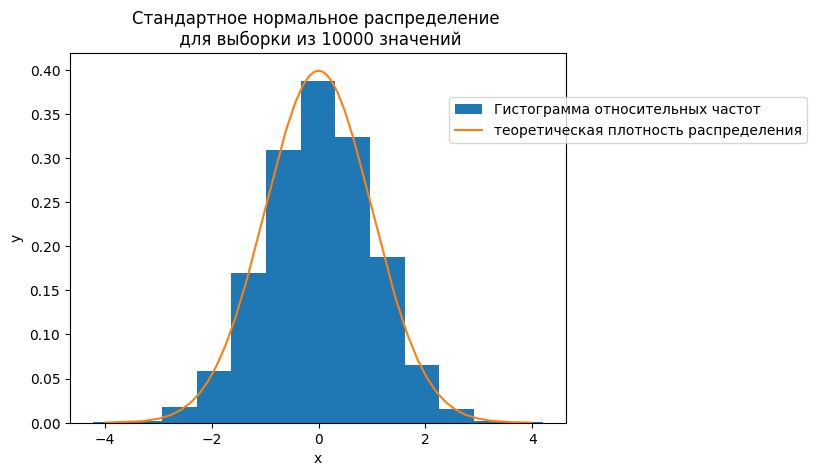

In [8]:
plt.hist(random_values, m, density=True, label="Гистограмма относительных частот")
plt.plot(x, f.pdf(x), label="теоретическая плотность распределения")
plt.title(f"Стандартное нормальное распределение \n для выборки из {n} значений")
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc="upper right", bbox_to_anchor=(1.5, 0.9))

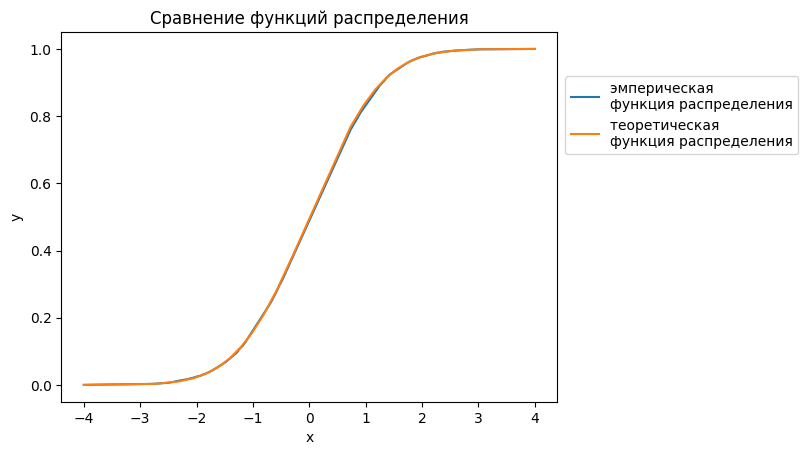

In [9]:
plt.plot(x, empiric_cdf_list(x, random_values, n),'-', label="эмперическая \nфункция распределения")
plt.plot(x, f.cdf(x),'-', label="теоретическая \nфункция распределения")
plt.title("Сравнение функций распределения")

plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc="upper right", bbox_to_anchor=(1.5, 0.9))
plt.show()

In [10]:
print_stat(random_values)


Выборочная мода..............................: -4.23
Выборочное cреднее значение..................: 0.01
Медиана......................................: 0.02
Выборочная дисперсия.........................: 1.02
Исправленная дисперсия.......................: 1.02
Выборочное среднеквадратическое  отклонение..: 1.01
Исправленное среднеквадратическое  отклонение: 1.01


## Задание 3

In [2]:
df = pd.read_csv("Lab_06/Вариант 7.3.csv")
df.head()

,Age,Education,Geography,EstimatedSalary,Tenure
0,30,Bachelors,Germany,42933.26,3
1,29,Masters,Spain,117173.80,2
2,46,Masters,France,140130.22,7
3,58,Bachelors,Germany,5097.67,1
4,34,PHD,Spain,66695.71,9


1. Age – возраст клиента:
    1. признак количественный, т.к. значения признака имеют числовое выражения, а также арефметические операции над этими значениями будут осмыслены: разница возраста, суммарный возраст, средний возраст;
    2. шкала измерения - абсолютная, т.к. начало измерения и единица измерения фиксированы (0 лет и 1 год соответственно);
    3. признак является дискретным, т.к. множество его значений - расширенные натуральные числа, а множество натуральных чисел счётно. По определению признак является дискретным, если множество его значений конечно или счётно.

2. Education – уровень образования:
    1. признак категориальный, т.к. значения признака не имеют числового выражения, а также арифметические операции над этими значениями не будут осмыслены. Признак порядковый, т.к. на множестве уровня образования можно ввести осмысленное отношение порядка: 
    ... < Bachelor < Master < Doctor < ...
    2. шкала измерения - шкала порядка, т.к. на множестве значений можно ввести отношения порядка;
    3. признак является дискретным, т.к. множество его значений конечно.

3. Geography – страна проживания:
    1. признак категориальный, т.к. значения признака не имеют числового выражения, а также арифметические операции над этими значениями не будут осмыслены. Признак номинальный, т.к. на множестве страны проживания нельзя ввести осмысленное отношение порядка;
    2. шкала измерения - номинальная, т.к. на множестве значений нельзя ввести отношение порядка;
    3. признак является дискретным, т.к. множество его значений конечно.

4. EstimatedSalary – расчетная заработная плата (при условии, что зарплата начисляется в одной валюте):
    1. признак количественный, т.к. значения признака имеют числовые выражения, а также арефметические операции над этими значениями будут осмыслены;
    2. шкала измерения - аюсолютная, т.к. начало измерения и единица измерения фиксированы (0 и 1 денежная единица соответственно);
    3. признак является дискретными, т.к. множество его значений - рациональные числа (не божет быть зарплаты √2 копеек), а множество рациональных чисел счётно. По определению признак является дискретным, если множество его значений конечно или счётно.

5. Tenure – сколько лет является клиентом банка:
    1. признак количественный, т.к. значения признака имеют числовое выражения, а также арефметические операции над этими значениями будут осмыслены: разница лет, суммарное количество лет, среднее количество лет;
    2. шкала измерения - абсолютная, т.к. начало измерения и единица измерения фиксированы (0 лет и 1 год соответственно);
    3. признак является дискретным, т.к. множество его значений - расширенные натуральные числа, а множество натуральных чисел счётно. По определению признак является дискретным, если множество его значений конечно или счётно.

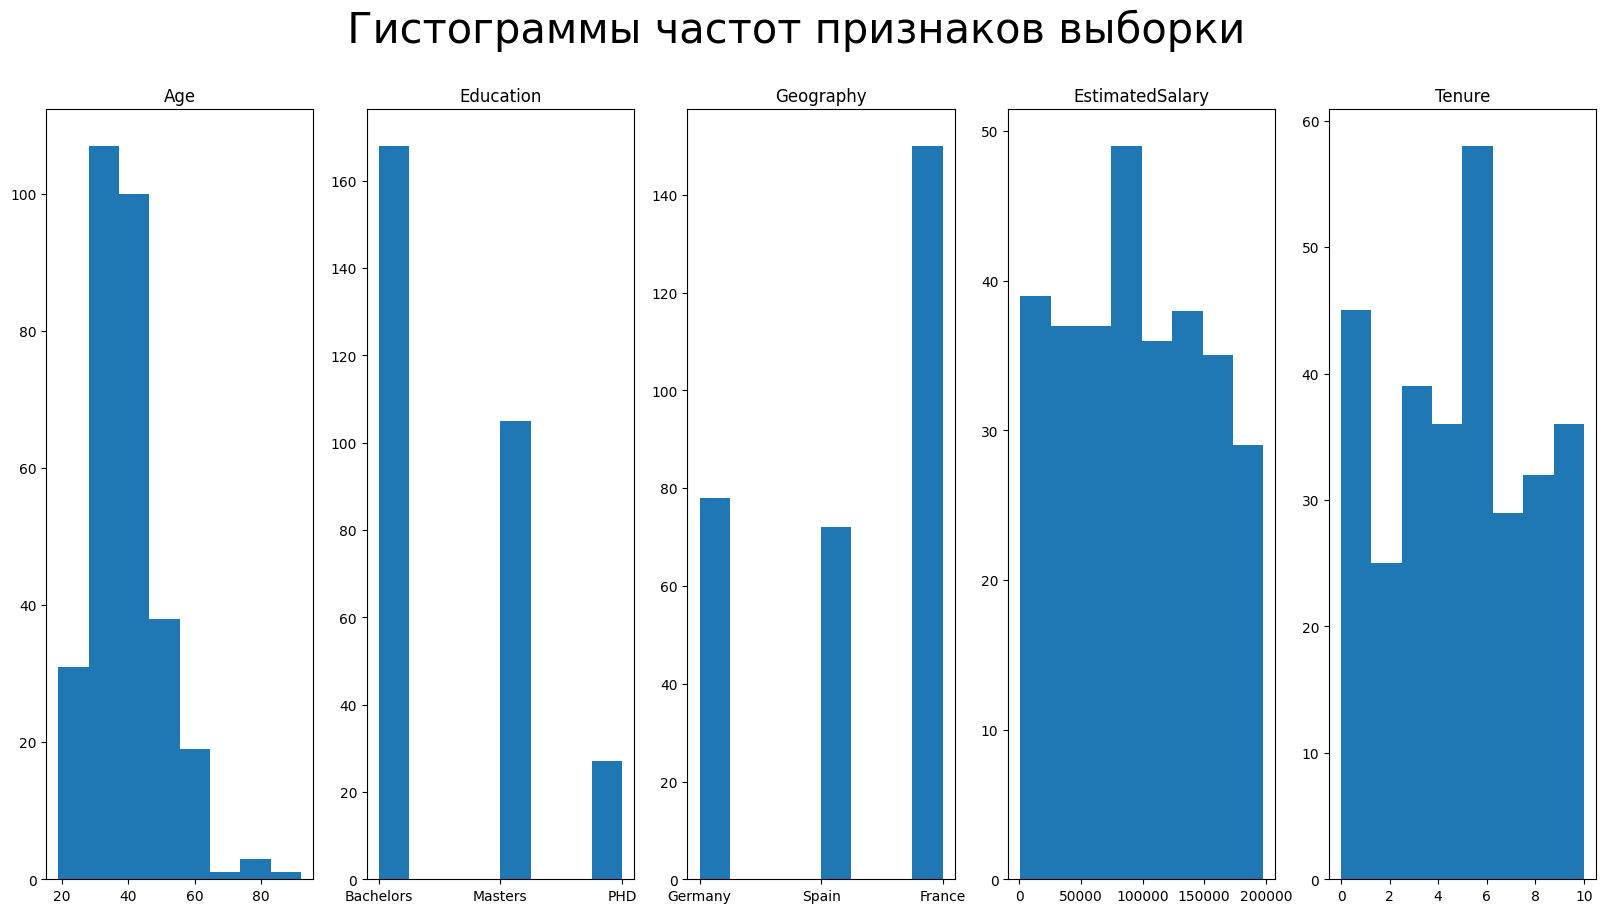

In [17]:
fig, ax = plt.subplots(1, len(df.columns))
fig.set_size_inches(20, 10)
fig.suptitle(' Гистограммы частот признаков выборки ', fontsize=30)
for i, column_name in enumerate(df.columns):

    column = df[column_name]
    m = int(math.log2(len(column)))
    ax[i].hist(column, m, density=False)
    ax[i].set_title(column_name)



In [45]:
for i, column_name in enumerate(df.columns):
    print(f"{i+1} - {column_name}:")
    print_stat(df[column_name])
    print()

1 - Age:
Выборочная мода..............................: 37.00
Выборочное cреднее значение..................: 39.70
Медиана......................................: 39.00
Выборочная дисперсия.........................: 112.59
Исправленная дисперсия.......................: 112.97
Выборочное среднеквадратическое  отклонение..: 10.61
Исправленное среднеквадратическое  отклонение: 10.63

2 - Education:
Выборочная мода..............................: Bachelors

3 - Geography:
Выборочная мода..............................: France

4 - EstimatedSalary:
Выборочная мода..............................: 878.87
Выборочное cреднее значение..................: 95682.87
Медиана......................................: 93548.12
Выборочная дисперсия.........................: 3036645703.41
Исправленная дисперсия.......................: 3046801709.11
Выборочное среднеквадратическое  отклонение..: 55105.77
Исправленное среднеквадратическое  отклонение: 55197.84

5 - Tenure:
Выборочная мода.........................

1. Age: для абсолютной шкалы можно вычислить любые оценки.
2. Education: для порядковой шкалы моржно вычислить только лишь моду.
3. Geography: для номинальной шкалы моржно вычислить только лишь моду.
4. EstimatedSalary: для абсолютной шкалы можно вычислить любые оценки.
5. Tenure: для абсолютной шкалы можно вычислить любые оценки.

## Задание 4